In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/thesis data/churn-data_11_DFS_trans_only_pearsons-selected.csv')

In [ ]:
data = df.drop(df.columns[0:2,], axis=1)
data.head(3)

,user_months,phones_used,handset_price,handset_age,cred_score,cred_score + phones_used,COSINE(handset_age),COSINE(handset_price),COSINE(phones_used),COSINE(user_months),CUM_MAX(cred_score),CUM_MAX(handset_age),CUM_MAX(handset_price),CUM_MAX(phones_used),CUM_MAX(user_months),CUM_MEAN(cred_score),CUM_MEAN(handset_price),CUM_MEAN(phones_used),CUM_MIN(cred_score),CUM_MIN(handset_age),CUM_MIN(phones_used),CUM_MIN(user_months),CUM_SUM(cred_score),DIFF(cred_score),DIFF(handset_age),DIFF(handset_price),DIFF(phones_used),DIFF(user_months),1 / handset_age,1 / handset_price,1 / phones_used,1 / user_months,cred_score / handset_age,cred_score / handset_price,cred_score / phones_used,cred_score / user_months,handset_age / cred_score,handset_age / handset_price,handset_age / user_months,handset_price / cred_score,handset_price / phones_used,handset_price / user_months,phones_used / cred_score,phones_used / handset_age,phones_used / handset_price,phones_used / user_months,user_months / cred_score,user_months / handset_age,user_months / handset_price,1 % handset_age,1 % handset_price,1 % user_months,cred_score % phones_used,handset_age % cred_score,handset_age % handset_price,handset_age % phones_used,handset_age % user_months,handset_price % cred_score,handset_price % handset_age,handset_price % phones_used,handset_price % user_months,phones_used % cred_score,user_months % cred_score,user_months % handset_price,user_months % phones_used,cred_score % 1,handset_age % 1,handset_price % 1,phones_used % 1,user_months % 1,cred_score * handset_age,cred_score * handset_price,cred_score * phones_used,cred_score * user_months,handset_age * handset_price,handset_age * phones_used,handset_price * phones_used,handset_price * user_months,phones_used * user_months,NATURAL_LOGARITHM(handset_age),SINE(handset_age),SINE(handset_price),SINE(phones_used),SINE(user_months),TANGENT(handset_age),TANGENT(handset_price),TANGENT(phones_used),TANGENT(user_months),area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,new_user_N,new_user_U,new_user_Y,refurb_or_new_True,dualband_N,dualband_T,dualband_Y,web_capable_UNKOWN,web_capable_WC,web_capable_WCMB,manual_limit_False,PRIZM_code_C,PRIZM_code_R,PRIZM_code_S,PRIZM_code_T,PRIZM_code_U,credit_card_False,Customer_ID = PRIZM_code_False,Customer_ID = dualband_False,Customer_ID = handset_age_False,Customer_ID = handset_price_False,Customer_ID = manual_limit_False,Customer_ID = new_user_False,Customer_ID = phones_used_False,Customer_ID = refurb_or_new_False,Customer_ID = user_months_False,Customer_ID = web_capable_False,PRIZM_code = refurb_or_new_False,PRIZM_code = user_months_False,PRIZM_code = web_capable_False,area = Customer_ID_False,area = PRIZM_code_False,area = cred_score_False,area = credit_card_False,area = dualband_False,area = handset_age_False,area = handset_price_False,area = manual_limit_False,area = new_user_False,area = phones_used_False,area = refurb_or_new_False,area = user_months_False,area = web_capable_False,cred_score = Customer_ID_False,cred_score = PRIZM_code_False,cred_score = credit_card_False,cred_score = dualband_False,cred_score = handset_age_False,cred_score = handset_price_False,cred_score = manual_limit_False,cred_score = new_user_False,cred_score = phones_used_False,cred_score = user_months_False,cred_score = web_capable_False,credit_card = Customer_ID_False,credit_card = PRIZM_code_False,credit_card = dualband_False,credit_card = handset_age_False,credit_card = handset_price_False,credit_card = manual_limit_False,credit_card = new_user_False,credit_card = phones_used_False,credit_card = user_months_False,credit_card = we

In [ ]:
# remove customer_id variables
cust = list(filter(lambda x: 'Customer_ID' in x, data.columns))
data = data.drop(columns=cust)
data.shape

(90692, 350)

In [ ]:
# random sampling (20%)
#data = data.sample(frac =.2)
#data.shape

(18138, 350)

In [ ]:
data.shape

(90692, 350)

In [ ]:
# NA percentage
pd.set_option('display.max_rows', None)
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

CUM_MIN(cred_score)               100.000000
DIFF(cred_score)                    0.001103
DIFF(handset_age)                   0.001103
DIFF(handset_price)                 0.001103
DIFF(phones_used)                   0.001103
DIFF(user_months)                   0.001103
1 / handset_age                     0.029771
cred_score / handset_age            0.029771
handset_age / cred_score           27.962775
handset_price / cred_score         27.962775
phones_used / cred_score           27.962775
phones_used / handset_age           0.029771
user_months / cred_score           27.962775
user_months / handset_age           0.029771
1 % handset_age                     0.029771
handset_age % cred_score           27.962775
handset_price % cred_score        100.000000
handset_price % handset_age         0.029771
phones_used % cred_score           27.962775
user_months % cred_score           27.962775
cred_score % 1                    100.000000
handset_age % 1                   100.000000
handset_pr

In [ ]:
data = data.drop(['CUM_MIN(cred_score)', 'handset_age / cred_score','handset_price / cred_score',
                         'phones_used / cred_score', 'user_months / cred_score', 'handset_age % cred_score',
                         'handset_price % cred_score','phones_used % cred_score','user_months % cred_score',
                         'cred_score % 1','handset_age % 1','handset_price % 1','phones_used % 1','user_months % 1'],
                 axis=1)

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

DIFF(cred_score)                  0.001103
DIFF(handset_age)                 0.001103
DIFF(handset_price)               0.001103
DIFF(phones_used)                 0.001103
DIFF(user_months)                 0.001103
1 / handset_age                   0.029771
cred_score / handset_age          0.029771
phones_used / handset_age         0.029771
user_months / handset_age         0.029771
1 % handset_age                   0.029771
handset_price % handset_age       0.029771
NATURAL_LOGARITHM(handset_age)    0.029771
dtype: float64

In [ ]:
data.shape

(90692, 336)

In [ ]:
data = data.dropna()
data.shape

(90664, 336)

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

Series([], dtype: float64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['churn'], axis=1),
    data['churn'],
    test_size=0.3,
    random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63464, 335), (27200, 335), (63464,), (27200,))

In [ ]:
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error 
from math import sqrt

def backward_regression(X, y,
                           initial_list=[], 
                           threshold_out = 0.05, # P-value 임계값 (제거 기준)
                           feature_list = X_train.columns.tolist()
                           ):
    
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature_list
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
      
    return included,step,steps,adj_r_squared_list,sv_per_step

backward_valriables_function,step,steps,adj_r_squared_list,sv_per_step = backward_regression(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[backward_valriables_function]))).fit(disp=0) 
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     66.11
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:12:22   Log-Likelihood:                -44352.
No. Observations:               63464   AIC:                         8.881e+04
Df Residuals:                   63410   BIC:                         8.930e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
X_train[backward_valriables_function].shape

(63464, 55)

In [ ]:
y_pred = model.predict(X_test[backward_valriables_function]) 
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

ValueError: ignored

In [ ]:
X_test[backward_valriables_function].shape

(27200, 55)

In [ ]:
pd.set_option('display.max_columns', None)
X_train[backward_valriables_function].columns

Index(['phones_used', 'handset_age', 'cred_score', 'cred_score + phones_used',
       'COSINE(handset_price)', 'COSINE(user_months)', 'CUM_MAX(handset_age)',
       'CUM_MEAN(cred_score)', 'CUM_MEAN(handset_price)',
       'CUM_MEAN(phones_used)', 'CUM_SUM(cred_score)', '1 / user_months',
       'cred_score / phones_used', 'cred_score / user_months',
       'handset_age / handset_price', 'handset_price / user_months',
       'phones_used / user_months', 'user_months / handset_price',
       'cred_score % phones_used', 'user_months % handset_price',
       'cred_score * handset_price', 'cred_score * user_months',
       'handset_age * handset_price', 'handset_price * phones_used',
       'handset_price * user_months', 'phones_used * user_months',
       'SINE(handset_price)', 'SINE(user_months)', 'TANGENT(handset_price)',
       'TANGENT(user_months)', 'area_ATLANTIC SOUTH AREA',
       'area_CENTRAL/SOUTH TEXAS AREA', 'area_DALLAS AREA',
       'area_DC/MARYLAND/VIRGINIA AREA', 'area_G

In [ ]:
pd.set_option('display.max_columns', None)
X_test[backward_valriables_function].columns

Index(['phones_used', 'handset_age', 'cred_score', 'cred_score + phones_used',
       'COSINE(handset_price)', 'COSINE(user_months)', 'CUM_MAX(handset_age)',
       'CUM_MEAN(cred_score)', 'CUM_MEAN(handset_price)',
       'CUM_MEAN(phones_used)', 'CUM_SUM(cred_score)', '1 / user_months',
       'cred_score / phones_used', 'cred_score / user_months',
       'handset_age / handset_price', 'handset_price / user_months',
       'phones_used / user_months', 'user_months / handset_price',
       'cred_score % phones_used', 'user_months % handset_price',
       'cred_score * handset_price', 'cred_score * user_months',
       'handset_age * handset_price', 'handset_price * phones_used',
       'handset_price * user_months', 'phones_used * user_months',
       'SINE(handset_price)', 'SINE(user_months)', 'TANGENT(handset_price)',
       'TANGENT(user_months)', 'area_ATLANTIC SOUTH AREA',
       'area_CENTRAL/SOUTH TEXAS AREA', 'area_DALLAS AREA',
       'area_DC/MARYLAND/VIRGINIA AREA', 'area_G

In [ ]:
for i in X_test[backward_valriables_function]:
  print("'"+i+"'"+",")

'phones_used',
'handset_age',
'cred_score',
'cred_score + phones_used',
'COSINE(handset_price)',
'COSINE(user_months)',
'CUM_MAX(handset_age)',
'CUM_MEAN(cred_score)',
'CUM_MEAN(handset_price)',
'CUM_MEAN(phones_used)',
'CUM_SUM(cred_score)',
'1 / user_months',
'cred_score / phones_used',
'cred_score / user_months',
'handset_age / handset_price',
'handset_price / user_months',
'phones_used / user_months',
'user_months / handset_price',
'cred_score % phones_used',
'user_months % handset_price',
'cred_score * handset_price',
'cred_score * user_months',
'handset_age * handset_price',
'handset_price * phones_used',
'handset_price * user_months',
'phones_used * user_months',
'SINE(handset_price)',
'SINE(user_months)',
'TANGENT(handset_price)',
'TANGENT(user_months)',
'area_ATLANTIC SOUTH AREA',
'area_CENTRAL/SOUTH TEXAS AREA',
'area_DALLAS AREA',
'area_DC/MARYLAND/VIRGINIA AREA',
'area_GREAT LAKES AREA',
'area_HOUSTON AREA',
'area_MIDWEST AREA',
'area_NORTHWEST/ROCKY MOUNTAIN AREA',
'area_O

In [ ]:
X_test[backward_valriables_function].head(3)

,phones_used,handset_age,cred_score,cred_score + phones_used,COSINE(handset_price),COSINE(user_months),CUM_MAX(handset_age),CUM_MEAN(cred_score),CUM_MEAN(handset_price),CUM_MEAN(phones_used),CUM_SUM(cred_score),1 / user_months,cred_score / phones_used,cred_score / user_months,handset_age / handset_price,handset_price / user_months,phones_used / user_months,user_months / handset_price,cred_score % phones_used,user_months % handset_price,cred_score * handset_price,cred_score * user_months,handset_age * handset_price,handset_price * phones_used,handset_price * user_months,phones_used * user_months,SINE(handset_price),SINE(user_months),TANGENT(handset_price),TANGENT(user_months),area_ATLANTIC SOUTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_MIDWEST AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_TENNESSEE AREA,dualband_N,web_capable_UNKOWN,web_capable_WCMB,manual_limit_False,PRIZM_code_C,PRIZM_code_R,PRIZM_code_S,PRIZM_code_U,credit_card_False,cred_score = manual_limit_False,cred_score = phones_used_False,credit_card = phones_used_False,phones_used > cred_score_False,user_months > phones_used_False,handset_age > 0_False
54109,0.250000,0.074054,0.5,0.285714,0.499357,-1.000000,0.547998,0.900757,0.969574,0.480235,0.561766,0.272727,0.071429,0.136364,0.004636,0.109091,0.195804,0.018033,0.5,0.360656,0.20,0.180328,0.140041,0.116667,0.154386,0.118827,-0.873511,-0.008851,-0.039618,0.000039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
61745,0.071429,0.028524,0.5,0.107143,0.158105,0.136743,1.000000,0.911101,0.948916,0.473359,0.648404,0.428571,0.250000,0.214286,0.011905,0.025714,0.087912,0.076503,0.5,0.229508,0.03,0.114754,0.008091,0.005000,0.014737,0.021605,-0.988273,0.990617,-0.141571,0.032063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
35295,0.035714,0.183763,0.0,0.035714,0.716718,0.004426,0.547998,0.889561,0.846012,0.490530,0.361886,0.545455,0.000000,0.000000,0.015339,0.163636,0.055944,0.012022,0.0,0.180328,0.00,0.000000,0.260633,0.012500,0.057895,0.008488,-0.715051,-1.000000,-0.022596,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


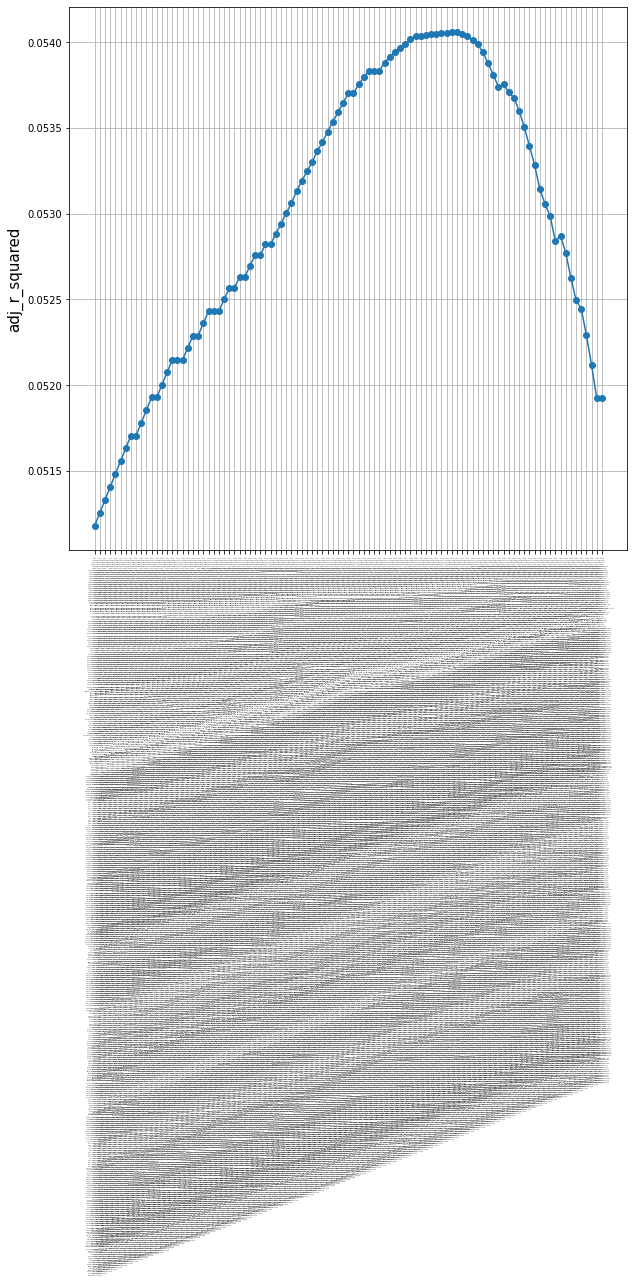

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=1)
plt.plot(steps, adj_r_squared_list, marker='o')
    
plt.ylabel('adj_r_squared',fontsize=font_size)
plt.grid(True)
plt.show()